In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [127]:
df = pd.read_csv('QueryExecutionTime.csv')

In [128]:
print(df)

                    Qusestion   Iteration  spark  mapReduced
0         Carrier delay query  Iteration1  8.795      16.777
1             NAS delay query  Iteration1  7.477      12.859
2         Weather delay query  Iteration1  7.462      13.042
3   Late aircraft delay query  Iteration1  7.129      14.713
4        Security delay query  Iteration1  7.190      14.941
5         Carrier delay query  Iteration2  0.363      12.581
6             NAS delay query  Iteration2  0.283       7.638
7         Weather delay query  Iteration2  0.308       6.851
8   Late aircraft delay query  Iteration2  0.301       7.592
9        Security delay query  Iteration2  0.285       7.205
10        Carrier delay query  Iteration3  1.016       7.154
11            NAS delay query  Iteration3  0.439       7.039
12        Weather delay query  Iteration3  0.429       7.113
13  Late aircraft delay query  Iteration3  0.315       6.800
14       Security delay query  Iteration3  0.434       6.935
15        Carrier delay 

In [129]:
#Run the query using Hadoop and Spark for 5 times and plot the graph in comparing both methods (running time vs iteration

In [130]:
# Create a new data frame with specific columns
df_iteration = df.iloc[:, [1, 3 , 2]]

# Show the new data frame
print(df_iteration)

     Iteration  mapReduced  spark
0   Iteration1      16.777  8.795
1   Iteration1      12.859  7.477
2   Iteration1      13.042  7.462
3   Iteration1      14.713  7.129
4   Iteration1      14.941  7.190
5   Iteration2      12.581  0.363
6   Iteration2       7.638  0.283
7   Iteration2       6.851  0.308
8   Iteration2       7.592  0.301
9   Iteration2       7.205  0.285
10  Iteration3       7.154  1.016
11  Iteration3       7.039  0.439
12  Iteration3       7.113  0.429
13  Iteration3       6.800  0.315
14  Iteration3       6.935  0.434
15  Iteration4       7.527  1.016
16  Iteration4       7.624  0.439
17  Iteration4       7.455  0.429
18  Iteration4       7.635  0.315
19  Iteration4       7.719  0.740
20  Iteration5       7.401  0.989
21  Iteration5       6.941  0.432
22  Iteration5       7.051  0.423
23  Iteration5       7.350  0.345
24  Iteration5       7.535  0.263


In [131]:
df_iteration_group = df_iteration.groupby('Iteration').agg({'mapReduced': 'mean', 'spark': 'mean'}).reset_index()


In [132]:
print(df_iteration_group)

    Iteration  mapReduced   spark
0  Iteration1     14.4664  7.6106
1  Iteration2      8.3734  0.3080
2  Iteration3      7.0082  0.5266
3  Iteration4      7.5920  0.5878
4  Iteration5      7.2556  0.4904


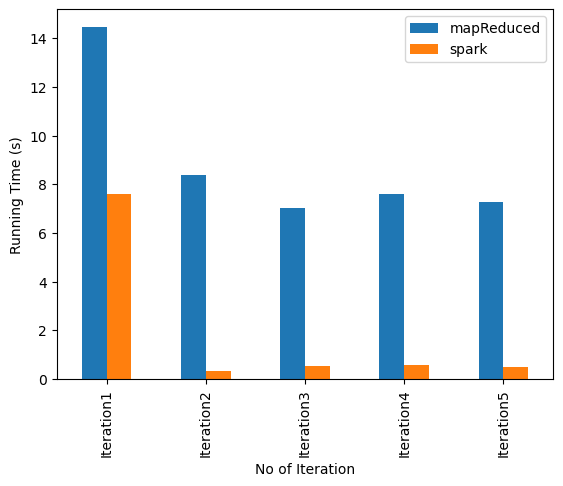

In [133]:
df_iteration_group.plot(x='Iteration', y=["mapReduced","spark"], kind='bar')

plt.xlabel("No of Iteration")
plt.ylabel("Running Time (s)")

# Display the chart
plt.show()

In [134]:
#Similarly process all queries and plot the time-comparison graphs as shown above. (Table below shows the comparison for all the queries with sample data for an iteration)

In [135]:
# Create a new data frame with specific columns
df_question = df.iloc[:, [0, 3 , 2]]

# Show the new data frame
print(df_question)

                    Qusestion  mapReduced  spark
0         Carrier delay query      16.777  8.795
1             NAS delay query      12.859  7.477
2         Weather delay query      13.042  7.462
3   Late aircraft delay query      14.713  7.129
4        Security delay query      14.941  7.190
5         Carrier delay query      12.581  0.363
6             NAS delay query       7.638  0.283
7         Weather delay query       6.851  0.308
8   Late aircraft delay query       7.592  0.301
9        Security delay query       7.205  0.285
10        Carrier delay query       7.154  1.016
11            NAS delay query       7.039  0.439
12        Weather delay query       7.113  0.429
13  Late aircraft delay query       6.800  0.315
14       Security delay query       6.935  0.434
15        Carrier delay query       7.527  1.016
16            NAS delay query       7.624  0.439
17        Weather delay query       7.455  0.429
18  Late aircraft delay query       7.635  0.315
19       Security de

In [136]:
df_question_group = df_question.groupby('Qusestion').agg({'mapReduced': 'mean', 'spark': 'mean'}).reset_index()

In [137]:
print(df_question_group)

                   Qusestion  mapReduced   spark
0        Carrier delay query     10.2880  2.4358
1  Late aircraft delay query      8.8180  1.6810
2            NAS delay query      8.4202  1.8140
3       Security delay query      8.8670  1.7824
4        Weather delay query      8.3024  1.8102


In [138]:
# Rename the column headers
df_question_group_rename = df_question_group.rename(columns={'Qusestion': 'Time Taken by query (in sec)', 'mapReduced': 'HiveQL', 'spark': 'Spark-SQL'})

display(df_question_group_rename)

,Time Taken by query (in sec),HiveQL,Spark-SQL
0,Carrier delay query,10.2880,2.4358
1,Late aircraft delay query,8.8180,1.6810
2,NAS delay query,8.4202,1.8140
3,Security delay query,8.8670,1.7824
4,Weather delay query,8.3024,1.8102


In [115]:
#Calculate average time taken by MapReduce and Spark for each query and plot the graph. Results shown below do not contain correct values. It is only to show the sample format.

In [139]:
print(df_question_group)

                   Qusestion  mapReduced   spark
0        Carrier delay query     10.2880  2.4358
1  Late aircraft delay query      8.8180  1.6810
2            NAS delay query      8.4202  1.8140
3       Security delay query      8.8670  1.7824
4        Weather delay query      8.3024  1.8102


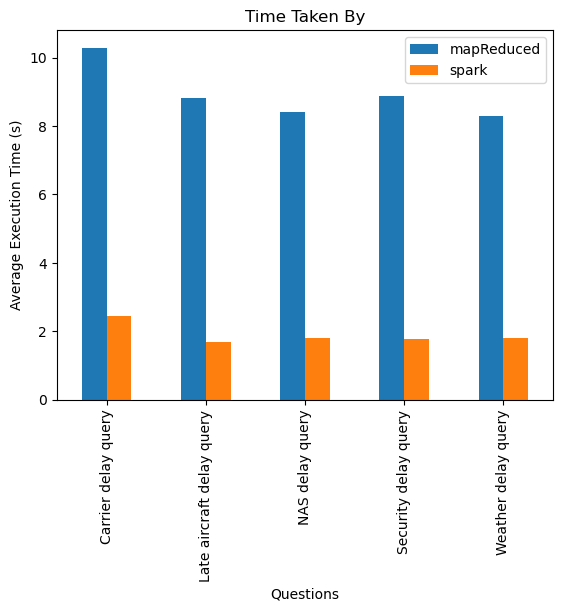

In [140]:
df_question_group.plot(x='Qusestion', y=["mapReduced","spark"], kind='bar')

plt.xlabel("Questions")
plt.ylabel("Average Execution Time (s)")
plt.title("Time Taken By")

# Display the chart
plt.show()

In [120]:
#Thank you